## 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('PracticeData.csv')
dataset[:5]

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [3]:
X = dataset.iloc[:, :-1].values # 결혼식 참석 인원 total
y = dataset.iloc[:, -1].values # 식수 인원 reception

## 전체 데이터를 훈련 세트와 테스트 세트로 분리. 비율은 75 : 25 

(단, random_state = 0 으로 설정)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 단순 선형 회귀 (Simple Linear Regression) 모델

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

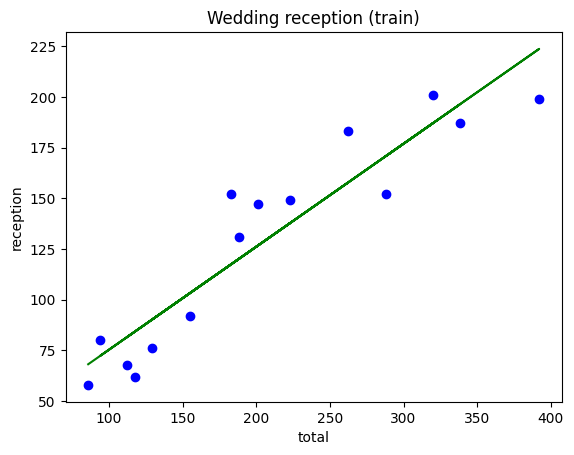

In [7]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

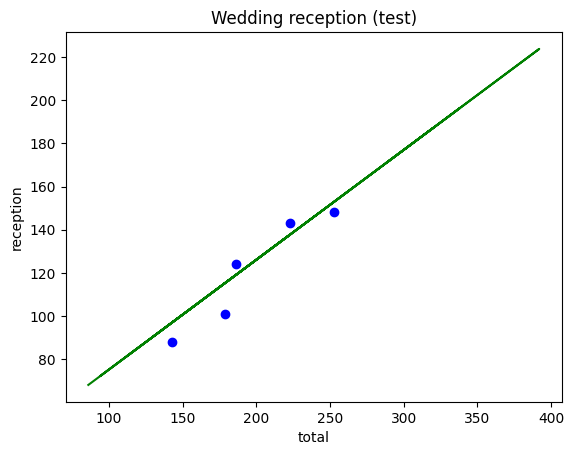

In [8]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

In [9]:
reg.score(X_train, y_train) # 훈련 세트 평가 점수

0.8707088403321211

In [10]:
reg.score(X_test, y_test) # 테스트 세트 평가 점수

0.8634953212566615

In [11]:
total = 300 # 결혼식 참석 인원
y_pred = reg.predict([[total]])

print(f'결혼식 참석 인원 {total} 명에 대한 예상 식수 인원은 {np.around(y_pred[0]).astype(int)} 명입니다.')

결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명입니다.
